In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
tsla = pd.read_csv('TSLA.csv')
tsla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [3]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [4]:
tsla.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

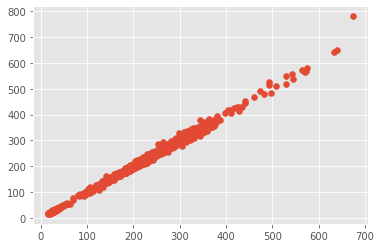

In [5]:
plt.scatter(tsla['Open'], tsla['Close'])

In [6]:
from sklearn.model_selection import train_test_split

traindf, testdf = train_test_split(tsla, test_size=0.3)

In [7]:
print("Shape of full dataset is: {0}".format(tsla.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (2416, 7)
Shape of training dataset is: (1691, 7)
Shape of test dataset is: (725, 7)


In [8]:
y_train = np.array(traindf['Close'])
X_train = np.array(traindf['Open'])
X_train = X_train.reshape(X_train.shape[0], 1)

In [9]:
y_test = np.array(testdf['Close'])
X_test = np.array(testdf['Open'])
X_test = X_test.reshape(X_test.shape[0], 1)

In [10]:
y_train.shape, X_train.shape

((1691,), (1691, 1))

In [11]:
y_test.shape, X_test.shape

((725,), (725, 1))

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
predicted_y = lm.predict(X_test)

r2 = lm.score(X_test, y_test)
print(f'r^2 = {r2:.5}')

r^2 = 0.99681


In [13]:
from sklearn.metrics import mean_squared_error

print(lm.score(X_train, y_train))

print(mean_squared_error(predicted_y, y_test))
print(mean_squared_error(y_train, lm.predict(X_train)))

print('Coefficients: \n', lm.coef_[0], lm.intercept_)

0.9981881091929152
45.77978487379272
25.53278399146216
Coefficients: 
 1.0011805564874836 -0.0972278246254632


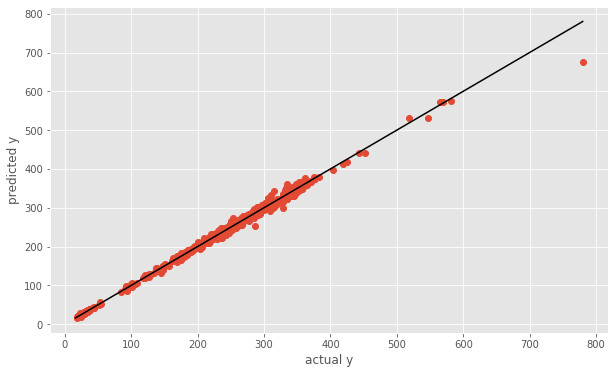

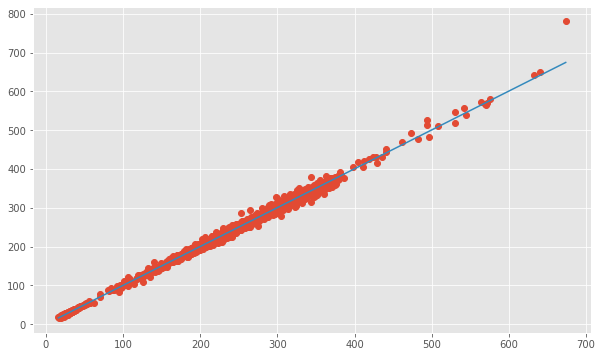

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(y_test, predicted_y, 'o')
grid = np.linspace(np.min(tsla['Close']), np.max(tsla['Close']), 100)
ax.plot(grid, grid, color="black") # 45 degree line
ax.set_xlabel("actual y")
ax.set_ylabel("predicted y")

fig1, ax1 = plt.subplots(1,1, figsize=(10,6))
ax1.plot(tsla['Open'], tsla['Close'], 'o')
xgrid = np.linspace(np.min(tsla['Open']), np.max(tsla['Open']), 100)
ax1.plot(xgrid, lm.predict(xgrid.reshape(100, 1)))

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
k = 5
knnreg = KNeighborsRegressor(n_neighbors=k)

In [17]:
knnreg.fit(X_train, y_train)

r2_train = knnreg.score(X_train, y_train)
r2_test = knnreg.score(X_test, y_test)

print(f'kNN model with {k} neighbors gives R^2 on the train set: {r2_train:.5}')
print(f'kNN model with {k} neighbors gives R^2 on the test set: {r2_test:.5}')

kNN model with 5 neighbors gives R^2 on the train set: 0.9983
kNN model with 5 neighbors gives R^2 on the test set: 0.9942


In [18]:
knnreg.predict(X_test)

array([357.3819948,  33.7679994, 211.4720032, 353.9840026, 419.9640014,
       130.8260024,  26.9740002, 195.1860016, 304.099994 ,  43.3959998,
       210.9500002, 207.3399996, 174.2859986, 230.3520018,  28.2559996,
        29.364    , 132.798001 , 357.3819948, 175.9179994, 336.6479982,
       182.0340026, 319.7160036, 346.6039978, 201.903998 , 190.7059968,
       217.600003 , 367.823999 ,  94.0479994, 207.1940002, 246.9679992,
        20.4099998, 302.628003 ,  92.019998 ,  28.5239998,  32.2060006,
       172.7559998, 575.1700074, 232.7399994, 319.406006 , 249.5820038,
       267.9100038,  20.6839994, 139.5879976, 248.7540008, 241.2099974,
       232.8879976, 209.5839994, 229.8119966,  34.7479994, 330.2440002,
       294.0119934,  27.9479998, 249.5820038, 333.9060058, 351.702002 ,
       278.0300046, 163.5799988,  26.136    ,  30.602    , 313.2179994,
        32.4860004,  30.602    ,  37.8259998, 304.9220032, 345.197998 ,
        23.7019996, 245.2439972, 266.8860048, 344.9020018, 286.7

In [19]:
# Make our lives easy by storing the different regressors in a dictionary
regdict = {}

# Make our lives easier by entering the k values from a list
k_list = [1, 2, 4, 15]

# Do a bunch of KNN regressions
for k in k_list:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    # Store the regressors in a dictionary
    regdict[k] = knnreg 

# Print the dictionary to see what we have
regdict

{1: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'),
 2: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'),
 4: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform'),
 15: KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')}

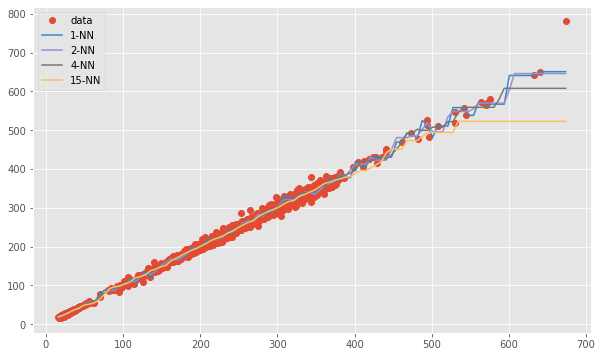

In [20]:
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(tsla['Open'], tsla['Close'], 'o', label="data")

xgrid = np.linspace(np.min(tsla['Open']), np.max(tsla['Open']), 100)

# let's unpack the dictionary to its elements (items) which is the k and Regressor
for k, regressor in regdict.items():
    predictions = regressor.predict(xgrid.reshape(-1,1)) 
    ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

Text(0, 0.5, '$R^{2}$')

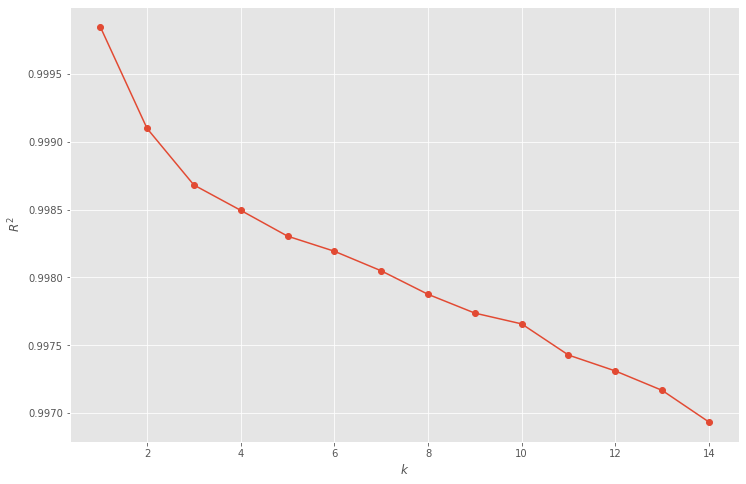

In [21]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_train, y_train) 
    
    # Calculate R^2 score
    score_train = knnreg.score(X_train, y_train) 
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

Text(0, 0.5, '$MSE$')

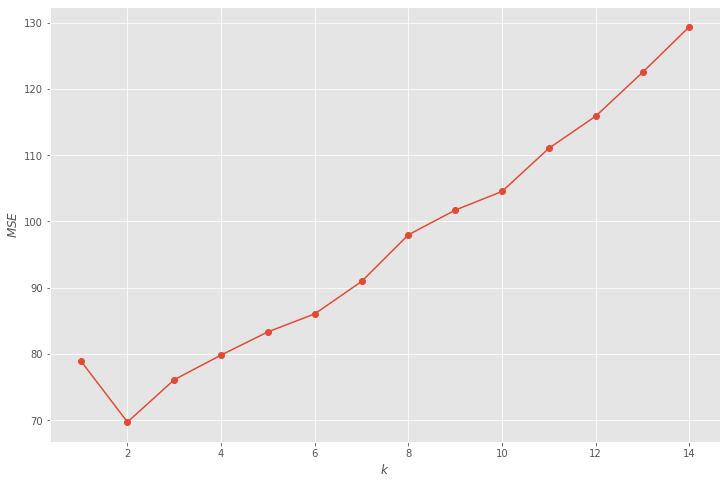

In [22]:
ks = range(1, 15) # Grid of k's
mse_total = [] # MSE scores
for k in ks:
    # Create KNN model
    knnreg = KNeighborsRegressor(n_neighbors=k) 
    
    # Fit the model to training data
    knnreg.fit(X_train, y_train) 
    
    # Calculate MSE score
    pred = knnreg.predict(X_test)
    mse = (((pred - y_test)**2).sum()) / len(pred)
    mse_total.append(mse)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, mse_total,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$MSE$')